In [6]:
import pandas as pd
import numpy as np 
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

wmt16-metrics-inputs-for-cs-en.tar.bz2 (741M)
wmt16-metrics-inputs-for-de-en.tar.bz2 (759M)
wmt16-metrics-inputs-for-en-bg.tar.bz2 (157M)
wmt16-metrics-inputs-for-en-cs.tar.bz2 (963M)
wmt16-metrics-inputs-for-en-de.tar.bz2 (1.1G)
wmt16-metrics-inputs-for-en-es.tar.bz2 (151M)
wmt16-metrics-inputs-for-en-eu.tar.bz2 (108M)
wmt16-metrics-inputs-for-en-fi.tar.bz2 (809M)
wmt16-metrics-inputs-for-en-nl.tar.bz2 (146M)
wmt16-metrics-inputs-for-en-pl.tar.bz2 (77K)
wmt16-metrics-inputs-for-en-pt.tar.bz2 (146M)
wmt16-metrics-inputs-for-en-ro.tar.bz2 (565M)
wmt16-metrics-inputs-for-en-ru.tar.bz2 (1.1G)
wmt16-metrics-inputs-for-en-tr.tar.bz2 (825M)
wmt16-metrics-inputs-for-fi-en.tar.bz2 (798M)
wmt16-metrics-inputs-for-ro-en.tar.bz2 (480M)
wmt16-metrics-inputs-for-ru-en.tar.bz2 (841M)
wmt16-metrics-inputs-for-tr-en.tar.bz2 (245M)


In [4]:
# Get the dataset
!wget https://www.statmt.org/wmt16/metrics-task/wmt2016-seg-metric-dev-5lps.tar.gz

# Unzip the dataset
!tar -xvzf wmt2016-seg-metric-dev-5lps.tar.gz

# Move the dataset to the data/ directory. If the data/ directory already exists, overwrite it.
!rm -rf data/wmt2016-seg-metric-dev-5lps
!mv wmt2016-seg-metric-dev-5lps data/

# Remove the compressed file
!rm wmt2016-seg-metric-dev-5lps.tar.gz
     

--2023-04-22 04:02:55--  https://www.statmt.org/wmt16/metrics-task/wmt2016-seg-metric-dev-5lps.tar.gz
Resolving www.statmt.org (www.statmt.org)... 129.215.197.184
Connecting to www.statmt.org (www.statmt.org)|129.215.197.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 421291 (411K) [application/x-gzip]
Saving to: ‘wmt2016-seg-metric-dev-5lps.tar.gz’

wmt2016-seg-metric- 100%[===================>] 411,42K  --.-KB/s    in 0,1s    

2023-04-22 04:02:55 (3,76 MB/s) - ‘wmt2016-seg-metric-dev-5lps.tar.gz’ saved [421291/421291]

wmt2016-seg-metric-dev-5lps/
wmt2016-seg-metric-dev-5lps/fi-en/
wmt2016-seg-metric-dev-5lps/fi-en/newstest2015.reference.fi-en
wmt2016-seg-metric-dev-5lps/fi-en/newstest2015.human.fi-en
wmt2016-seg-metric-dev-5lps/fi-en/newstest2015.source.fi-en
wmt2016-seg-metric-dev-5lps/fi-en/newstest2015.mt-system.fi-en
wmt2016-seg-metric-dev-5lps/fi-en/newstest2015.sbleumoses.fi-en
wmt2016-seg-metric-dev-5lps/de-en/
wmt2016-seg-metric-dev-5lps/de-en/

In [7]:

human_score = []
references = []
candidates = [] 

# Get the human score, the candidate and reference sentences for the de-en pair
with open(f"data/de-en/newstest2015.human.de-en") as f:
  for line in f.readlines():
    human_score.append(line.strip())
with open(f"data/de-en/newstest2015.mt-system.de-en") as f:
  for line in f.readlines():
    candidates.append(line.strip())
with open(f"data/de-en/newstest2015.reference.de-en") as f:
  for line in f.readlines():
    references.append(line.strip())

# Convert the human_score list to a list of floats
human_score = list(np.float_(human_score))

In [22]:
from correlations import *

bartscore = pd.read_csv("results/bartscore.csv")["0"]
bary_scores = pd.read_csv("results/bary_scores.csv")["0"]

bertscore = pd.read_csv("results/bertscore.csv")["0"]
bleuscore = pd.read_csv("results/bleuscore.csv")["0"]
cos_scores = pd.read_csv("results/cos_scores.csv")["0"]
depth_score = pd.read_csv("results/depth_score.csv")["0"]
infolm_score = pd.read_csv("results/infolm_score.csv")["0"]

moverscores = pd.read_csv("results/moverscores.csv")["0"]
rougel_score = pd.read_csv("results/rouge-l_score.csv")["0"]
rouge1_score = pd.read_csv("results/rouge1_score.csv")["0"]
rouge2_score = pd.read_csv("results/rouge2_score.csv")["0"]
ABBA_score_value = pd.read_csv("results/ABBA_score_value.csv")["0"]
DEW_SCORE = pd.read_csv("results/DEW_SCORE.csv")["0"]



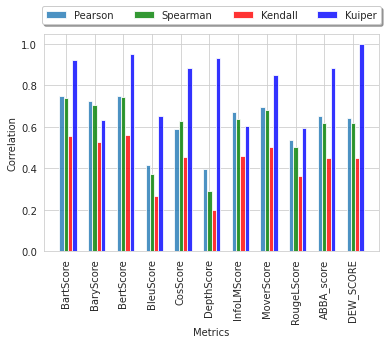

In [99]:
from correlations import *

# Vizualisation of correlations

df_bartscore = multiple_correlations(bartscore,human_score)
df_bary_scores = multiple_correlations(bary_scores,human_score)
df_bertscore = multiple_correlations(bertscore,human_score)
df_bleuscore = multiple_correlations(bleuscore,human_score)
df_cos_scores = multiple_correlations(cos_scores,human_score)
df_depth_score = multiple_correlations(depth_score,human_score)
df_infolm_score = multiple_correlations(infolm_score,human_score)
df_moverscores = multiple_correlations(moverscores,human_score)
df_rougel_score = multiple_correlations(rougel_score,human_score)
df_ABBA_score = multiple_correlations(ABBA_score_value,human_score)
df_DEW_score = multiple_correlations(DEW_SCORE,human_score)


#plot bar chart
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 11
means_pearson = (df_bartscore[0][0],abs(df_bary_scores[0][0]), df_bertscore[0][0], df_bleuscore[0][0], df_cos_scores[0][0], abs(df_depth_score[0][0]), abs(df_infolm_score[0][0]), df_moverscores[0][0], df_rougel_score[0][0], df_ABBA_score[0][0], df_DEW_score[0][0])
means_spearman = (df_bartscore[1][0],abs(df_bary_scores[1][0]), df_bertscore[1][0], df_bleuscore[1][0], df_cos_scores[1][0], abs(df_depth_score[1][0]), abs(df_infolm_score[1][0]), df_moverscores[1][0], df_rougel_score[1][0], df_ABBA_score[1][0], df_DEW_score[1][0])
means_kendall = (df_bartscore[2][0],abs(df_bary_scores[2][0]), df_bertscore[2][0], df_bleuscore[2][0], df_cos_scores[2][0], abs(df_depth_score[2][0]), abs(df_infolm_score[2][0]), df_moverscores[2][0], df_rougel_score[2][0], df_ABBA_score[2][0], df_DEW_score[2][0])
#means_kruskall = (df_bartscore[3][0],abs(df_bary_scores[3][0]), df_bertscore[3][0], df_bleuscore[3][0], df_cos_scores[3][0], abs(df_depth_score[3][0]), abs(df_infolm_score[3][0]), df_moverscores[3][0], df_rougel_score[3][0], df_ABBA_score[3][0], df_DEW_score[3][0])
means_kuiper = (df_bartscore[5][0],abs(df_bary_scores[5][0]), df_bertscore[5][0], df_bleuscore[5][0], df_cos_scores[5][0], abs(df_depth_score[5][0]), abs(df_infolm_score[5][0]), df_moverscores[5][0], df_rougel_score[5][0], df_ABBA_score[5][0], df_DEW_score[5][0])
#  pearson_score, spearmans_r, kendalltau_r, kruskal_r, pointbiserialr, kuiper_r

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, means_pearson, bar_width,
alpha=opacity,
label='Pearson')

rects2 = plt.bar(index + bar_width, means_spearman, bar_width,
alpha=opacity,
color='g',
label='Spearman')

rects3 = plt.bar(index + bar_width*2, means_kendall, bar_width,
alpha=opacity,
color='r',
label='Kendall')

#rects4 = plt.bar(index + bar_width*3, means_kruskall, bar_width,
#alpha=opacity,
#color='y',
#label='Kruskal')

rects5 = plt.bar(index + bar_width*3, means_kuiper, bar_width,
alpha=opacity,
color='b',
label='Kuiper')




plt.xlabel('Metrics')
plt.ylabel('Correlation')
#plt.title('Correlation between human judgement and metrics')
# xticks at 45 degree angle
plt.xticks(index + bar_width, ('BartScore', 'BaryScore', 'BertScore', 'BleuScore', 'CosScore', 'DepthScore', 'InfoLMScore', 'MoverScore', 'RougeLScore','ABBA_score','DEW_SCORE'), rotation=90)
# legends at top right outside the plot and not on title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=True)


#plt.tight_layout()
plt.show()



/tmp/ipykernel_38004/2981674992.py:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



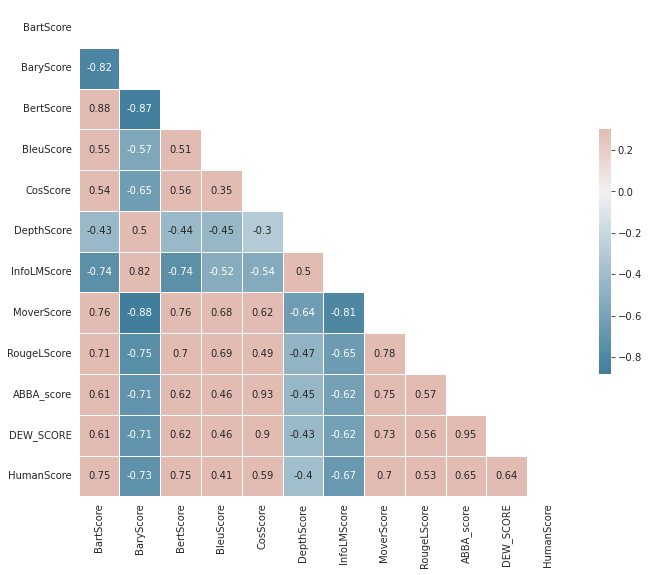

In [121]:
# draw a correlation matrix between all scores
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.DataFrame({'BartScore': bartscore, 'BaryScore': bary_scores, 'BertScore': bertscore, 'BleuScore': bleuscore, 'CosScore': cos_scores, 'DepthScore': depth_score, 'InfoLMScore': infolm_score, 'MoverScore': moverscores, 'RougeLScore': rougel_score, 'ABBA_score': ABBA_score_value, 'DEW_SCORE': DEW_SCORE, 'HumanScore': human_score})
corr = df_corr.corr()
# triu heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.show()


/tmp/ipykernel_38004/73270178.py:9: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



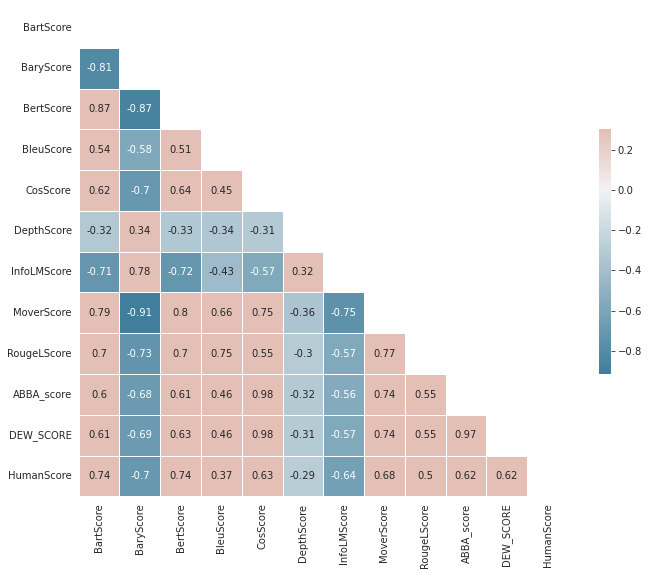

In [123]:
# draw a pearson correlation matrix between all scores
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.DataFrame({'BartScore': bartscore, 'BaryScore': bary_scores, 'BertScore': bertscore, 'BleuScore': bleuscore, 'CosScore': cos_scores, 'DepthScore': depth_score, 'InfoLMScore': infolm_score, 'MoverScore': moverscores, 'RougeLScore': rougel_score, 'ABBA_score': ABBA_score_value, 'DEW_SCORE': DEW_SCORE, 'HumanScore': human_score})

corr = df_corr.corr(method='spearman')
# triu heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


/tmp/ipykernel_38004/2576027111.py:9: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



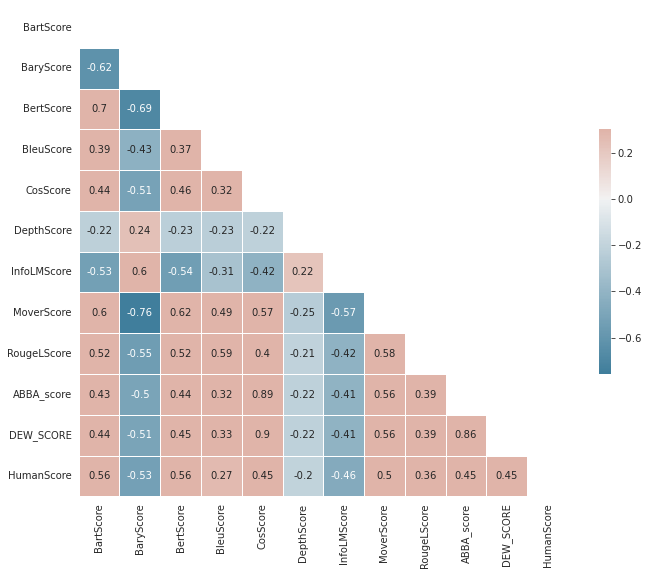

In [124]:
# draw a pearson correlation matrix between all scores
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.DataFrame({'BartScore': bartscore, 'BaryScore': bary_scores, 'BertScore': bertscore, 'BleuScore': bleuscore, 'CosScore': cos_scores, 'DepthScore': depth_score, 'InfoLMScore': infolm_score, 'MoverScore': moverscores, 'RougeLScore': rougel_score, 'ABBA_score': ABBA_score_value, 'DEW_SCORE': DEW_SCORE, 'HumanScore': human_score})

corr = df_corr.corr(method='kendall')
# triu heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [102]:
df = pd.DataFrame()
df["pearson"] = df_bartscore[0][0],abs(df_bary_scores[0][0]), df_bertscore[0][0], df_bleuscore[0][0], df_cos_scores[0][0], abs(df_depth_score[0][0]), abs(df_infolm_score[0][0]), df_moverscores[0][0], df_rougel_score[0][0], df_ABBA_score[0][0], df_DEW_score[0][0]
df["spearman"] = df_bartscore[1][0],abs(df_bary_scores[1][0]), df_bertscore[1][0], df_bleuscore[1][0], df_cos_scores[1][0], abs(df_depth_score[1][0]), abs(df_infolm_score[1][0]), df_moverscores[1][0], df_rougel_score[1][0], df_ABBA_score[1][0], df_DEW_score[1][0]
df["kendall"] = df_bartscore[2][0],abs(df_bary_scores[2][0]), df_bertscore[2][0], df_bleuscore[2][0], df_cos_scores[2][0], abs(df_depth_score[2][0]), abs(df_infolm_score[2][0]), df_moverscores[2][0], df_rougel_score[2][0], df_ABBA_score[2][0], df_DEW_score[2][0]
df["Kuiper"] = df_bartscore[5][0],abs(df_bary_scores[5][0]), df_bertscore[5][0], df_bleuscore[5][0], df_cos_scores[5][0], abs(df_depth_score[5][0]), abs(df_infolm_score[5][0]), df_moverscores[5][0], df_rougel_score[5][0], df_ABBA_score[5][0], df_DEW_score[5][0]

In [103]:
df.index = ['BartScore', 'BaryScore', 'BertScore', 'BleuScore', 'CosScore', 'DepthScore', 'InfoLMScore', 'MoverScore', 'RougeLScore','ABBA_score','DEW_SCORE']

In [71]:
df_bartscore[1]

SignificanceResult(statistic=0.7403467711554073, pvalue=6.099711831735148e-88)